In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
data=pd.read_csv("/content/LoanApprovalPrediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

# **Handling Missing Values**

In [62]:
mode = data['Loan_Amount_Term'].mode()[0]
data['Loan_Amount_Term'].fillna(mode, inplace=True)

In [63]:
mean_1 = data['LoanAmount'].mean()
data['LoanAmount'].fillna(mean_1, inplace=True)
data['Credit_History'].fillna(0, inplace=True)

In [64]:
def fill_dependents(row):
    if row['Married'] == 'Yes':
        return 1.0
    else:
        return 0.0

In [65]:
data['Dependents'] = data.apply(lambda row: fill_dependents(row) if pd.isnull(row['Dependents']) else row['Dependents'], axis=1)

In [66]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Label Encoding**

In [67]:
data.nunique()

Loan_ID              517
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      429
CoapplicantIncome    250
LoanAmount           184
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [68]:
binary_cols= ['Gender','Married','Education','Self_Employed','Loan_Status']
ordinal_cols= ['Property_Area']
cat_cols= binary_cols + ordinal_cols

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_cols:
    data[i] = label_encoder.fit_transform(data[i])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,143.809619,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,LP002699,1,1,2.0,0,1,17500,0.0,400.000000,360.0,1.0,0,1
513,LP002705,1,1,0.0,0,0,3775,0.0,110.000000,360.0,1.0,1,1
514,LP002706,1,1,1.0,1,0,5285,1430.0,161.000000,360.0,0.0,1,1
515,LP002714,1,0,1.0,1,0,2679,1302.0,94.000000,360.0,1.0,1,1


# Normalizing the data

In [70]:
X = data.drop(columns=['Loan_ID','Loan_Status'])
y= data['Loan_Status']

In [71]:
column_names = X.columns

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm= scaler.fit_transform(X)
X_norm_1= pd.DataFrame(X_norm, columns= column_names)
X_norm_1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.0000,0.200331,0.74359,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.0754,0.175355,0.74359,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.0000,0.077409,0.74359,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.1179,0.162717,0.74359,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.0000,0.195893,0.74359,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
512,1.0,1.0,0.666667,0.0,1.0,0.214595,0.0000,0.605055,0.74359,1.0,0.0
513,1.0,1.0,0.000000,0.0,0.0,0.044836,0.0000,0.146919,0.74359,1.0,0.5
514,1.0,1.0,0.333333,1.0,0.0,0.063513,0.0715,0.227488,0.74359,0.0,0.5
515,1.0,0.0,0.333333,1.0,0.0,0.031280,0.0651,0.121643,0.74359,1.0,0.5


# Exploratory Data Analysis

In [73]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Loan_Status']
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)
print(correlation_with_target_sorted)

Loan_Status          1.000000
Credit_History       0.400863
Married              0.090993
Property_Area        0.030617
Gender               0.028086
Dependents           0.023628
Self_Employed        0.000986
CoapplicantIncome   -0.006744
ApplicantIncome     -0.042107
Loan_Amount_Term    -0.049016
LoanAmount          -0.079674
Education           -0.094673
Name: Loan_Status, dtype: float64


<ipython-input-73-6fe86beb8216>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


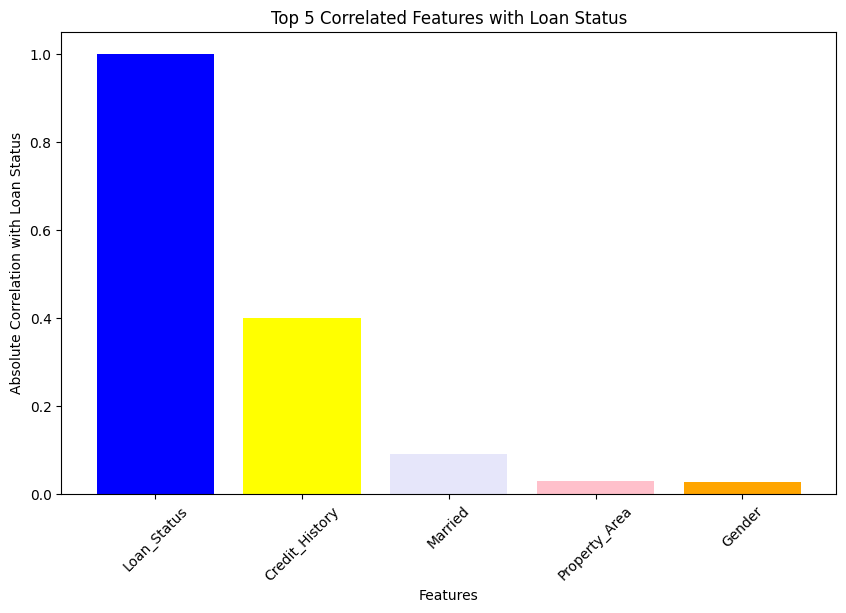

In [74]:
top_n = 5
top_features = correlation_with_target_sorted.head(top_n)
top_features_names = top_features.index


bar_colors = ['blue', 'yellow', 'lavender', 'pink', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(top_features_names, top_features.values, color=bar_colors)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Loan Status')
plt.title(f'Top {top_n} Correlated Features with Loan Status')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

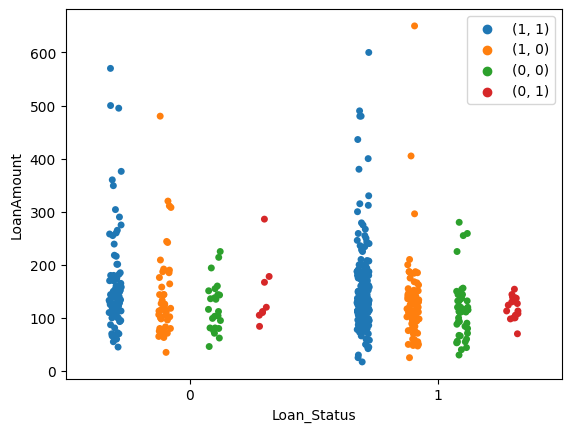

In [75]:
sns.stripplot(x='Loan_Status', y='LoanAmount', data= data, hue=data[['Gender','Married']].apply(tuple, axis=1),dodge= True)

Observations:


*   Married, male, amount<200 = highest probability of approval
*   Married, female, amount>150 = lowest probablity of approval




In [76]:
# corr_data= data[['Credit_History','Loan_Status']]
# corr_data

In [77]:
loan_status_counts = data['Loan_Status'].value_counts()
print("Number of loans approved:", loan_status_counts[1], " Number of loans rejected:", loan_status_counts[0])

gender_counts = data['Gender'].value_counts()
print("Number of Male Applicants: ",gender_counts[1]," Number of Female Applicants: ",gender_counts[0])

married_counts = data['Married'].value_counts()
print("Number of Married Applicants:", married_counts[1], "Number of Non-Married Applicants:", married_counts[0])

education_counts = data['Education'].value_counts()
print("Number of Graduate Applicants:", education_counts[1], "Number of Non-Graduate Applicants:", education_counts[0])

self_employed_counts = data['Self_Employed'].value_counts()
print("Number of Self-Employed Applicants:", self_employed_counts[1], "Number of Non-Self-Employed Applicants:", self_employed_counts[0])


Number of loans approved: 357  Number of loans rejected: 160
Number of Male Applicants:  422  Number of Female Applicants:  95
Number of Married Applicants: 331 Number of Non-Married Applicants: 186
Number of Graduate Applicants: 115 Number of Non-Graduate Applicants: 402
Number of Self-Employed Applicants: 94 Number of Non-Self-Employed Applicants: 423


# **Train Test Split**

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# train set, dev set, test set
# test set is used for training
# dev set is used for testing while training
# dont touch test set until you have trained the model completely

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [80]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Dev set shape:", X_dev.shape, y_dev.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (413, 11) (413,)
Dev set shape: (52, 11) (52,)
Testing set shape: (52, 11) (52,)


##**SVM**

In [81]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled= scaler.fit_transform(X_test)

In [83]:
svm_model = SVC(kernel='linear', C=10)

In [84]:
svm_model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [85]:
y_dev_pred = svm_model.predict(X_dev_scaled)

In [86]:
accuracy_dev = accuracy_score(y_dev, y_dev_pred)
print(f"Accuracy on Dev Set: {accuracy_dev:.2f}")

Accuracy on Dev Set: 0.81


In [87]:
print("Classification Report on Dev Set:\n", classification_report(y_dev, y_dev_pred))

Classification Report on Dev Set:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.81      0.94      0.87        36

    accuracy                           0.81        52
   macro avg       0.80      0.72      0.74        52
weighted avg       0.81      0.81      0.79        52



In [88]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_dev_scaled)
accuracy_rbf = accuracy_score(y_dev, y_pred_rbf)

In [89]:
print(f"Accuracy on Dev Set: {accuracy_rbf:.2f}")

Accuracy on Dev Set: 0.81


In [90]:
print("Classification Report on Dev Set:\n", classification_report(y_dev,y_pred_rbf ))

Classification Report on Dev Set:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.81      0.94      0.87        36

    accuracy                           0.81        52
   macro avg       0.80      0.72      0.74        52
weighted avg       0.81      0.81      0.79        52



In [91]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_dev_scaled)
accuracy_poly = accuracy_score(y_dev, y_pred_poly)

In [92]:
print(f"Accuracy on Dev Set: {accuracy_poly:.2f}")
print("Classification Report on Dev Set:\n", classification_report(y_dev,y_pred_poly ))

Accuracy on Dev Set: 0.75
Classification Report on Dev Set:
               precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.76      0.94      0.84        36

    accuracy                           0.75        52
   macro avg       0.73      0.63      0.64        52
weighted avg       0.74      0.75      0.71        52



In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}

svm_model = SVC(kernel='linear')
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
C_values = [params['C'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
best_params = grid_search.best_params_


best_svm_model = SVC(kernel='linear', C=best_params['C'])
best_svm_model.fit(X_train_scaled, y_train)


y_dev_pred = best_svm_model.predict(X_dev_scaled)


accuracy_dev = accuracy_score(y_dev, y_dev_pred)
print(f"Accuracy on Dev Set: {accuracy_dev:.2f}")


Accuracy on Dev Set: 0.81


In [94]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [95]:
y_pred_rbf = svm_rbf.predict(X_dev_scaled)
accuracy_rbf = accuracy_score(y_dev, y_pred_rbf)
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, scoring='accuracy', cv=5)


grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


best_svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
best_svm_rbf.fit(X_train_scaled, y_train)

Best Parameters: {'C': 10, 'gamma': 0.001}
Best Accuracy: 0.7434616514839847


SVC(C=10, gamma=0.001, random_state=42)

## **LOGISTIC REGRESSION**

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [97]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [98]:
y_dev_pred = model.predict(X_dev_scaled)

In [99]:
accuracy_dev = accuracy_score(y_dev, y_dev_pred)
print(f'Dev Set - Accuracy: {accuracy_dev}')

Dev Set - Accuracy: 0.8076923076923077


In [100]:
conf_matrix_dev = confusion_matrix(y_dev, y_dev_pred)
print(f'Dev Set - Confusion Matrix:\n{conf_matrix_dev}')

Dev Set - Confusion Matrix:
[[ 8  8]
 [ 2 34]]


In [101]:
classification_rep_dev = classification_report(y_dev, y_dev_pred)
print(f'Validation Set - Classification Report:\n{classification_rep_dev}')

Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.81      0.94      0.87        36

    accuracy                           0.81        52
   macro avg       0.80      0.72      0.74        52
weighted avg       0.81      0.81      0.79        52



##**DECISION TREES**

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
y_dev_pred_dt = dt_model.predict(X_dev_scaled)

In [105]:
accuracy_dev_dt = accuracy_score(y_dev, y_dev_pred_dt)
print(f'Decision Tree - DevSet - Accuracy: {accuracy_dev_dt}')

Decision Tree - DevSet - Accuracy: 0.7115384615384616


In [106]:
conf_matrix_dev_dt = confusion_matrix(y_dev, y_dev_pred_dt)
print(f'Decision Tree - Dev Set - Confusion Matrix:\n{conf_matrix_dev_dt}')

Decision Tree - Dev Set - Confusion Matrix:
[[ 7  9]
 [ 6 30]]


In [107]:
classification_rep_dev_dt = classification_report(y_dev, y_dev_pred_dt)
print(f'Decision Tree - Validation Set - Classification Report:\n{classification_rep_dev_dt}')

Decision Tree - Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        16
           1       0.77      0.83      0.80        36

    accuracy                           0.71        52
   macro avg       0.65      0.64      0.64        52
weighted avg       0.70      0.71      0.70        52



**Final Selected Model - SVM (linear)**

In [108]:
y_test_pred = best_svm_model.predict(X_test_scaled)

In [109]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test:.2f}")

Accuracy on Test Set: 0.85


In [110]:
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.85      0.94      0.89        35

    accuracy                           0.85        52
   macro avg       0.85      0.79      0.81        52
weighted avg       0.85      0.85      0.84        52



In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k_values = [3, 5, 7, 10]
metrics_per_fold = []

for k in k_values:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]


        best_svm_model_cv = SVC(kernel='linear', C=best_params['C'])
        best_svm_model_cv.fit(X_train_cv, y_train_cv)

        y_pred_cv = best_svm_model_cv.predict(X_test_cv)


        accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
        precision_scores.append(precision_score(y_test_cv, y_pred_cv, average='weighted'))
        recall_scores.append(recall_score(y_test_cv, y_pred_cv, average='weighted'))
        f1_scores.append(f1_score(y_test_cv, y_pred_cv, average='weighted'))


    metrics_per_fold.append({
        'k': k,
        'accuracy': np.mean(accuracy_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1': np.mean(f1_scores)
    })

k_values = [result['k'] for result in metrics_per_fold]
accuracy_values = [result['accuracy'] for result in metrics_per_fold]

for result in metrics_per_fold:
    print(f"Number of Folds (k): {result['k']}")
    print(f"Mean Accuracy: {result['accuracy']:.4f}")
    print(f"Mean Precision: {result['precision']:.4f}")
    print(f"Mean Recall: {result['recall']:.4f}")
    print(f"Mean F1 Score: {result['f1']:.4f}")
    print("-" * 40)


Number of Folds (k): 3
Mean Accuracy: 0.7432
Mean Precision: 0.7273
Mean Recall: 0.7432
Mean F1 Score: 0.7287
----------------------------------------
Number of Folds (k): 5
Mean Accuracy: 0.7432
Mean Precision: 0.7332
Mean Recall: 0.7432
Mean F1 Score: 0.7288
----------------------------------------
Number of Folds (k): 7
Mean Accuracy: 0.7433
Mean Precision: 0.7302
Mean Recall: 0.7433
Mean F1 Score: 0.7293
----------------------------------------
Number of Folds (k): 10
Mean Accuracy: 0.7434
Mean Precision: 0.7339
Mean Recall: 0.7434
Mean F1 Score: 0.7281
----------------------------------------
